Throughout this Notebook CIFAR10 Dataset is used. You can find the dataset in the following link as well.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

# Part 2

Code a two-layer fully connected network with H = 200 hidden nodes. Choose the sigmoid function as
the activation function for the hidden nodes. The output layer has no activation function.

(a) Implement gradient descent and run for 300 epochs.

(b) Report the (initial) learning rate, training and testing loss and accuracies.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
def find_accuracy(pred,labels):
    pred_class = np.argmax(pred, axis=1)
    ground_truth = np.argmax(labels, axis=1)
    accurate_pred = [pred_class == ground_truth]
    return 100*np.sum(accurate_pred)/len(ground_truth)

In [ ]:
def MSE_with_reg(y_pred, ground_truth, batch_size,reg, weights):
  loss = 1./(batch_size*2)*np.square(y_pred-ground_truth).sum() + reg/(batch_size*2)*np.sum([np.sum(w*w) for w in weights])
  return loss;

In [ ]:
def batching(lst , m):
  batched = []
  for i in range(round(len(lst)/m)):
    batched.append(lst[i*m:(i+1)*m])
  return batched;

In [ ]:
def CustomNNwithSGD(batch_size = 50000,val_batch_size=10000, epochs = 300, lr = 0.01, lr_decay = 0.999, reg = 1.2):

  std=1e-5
  w1 = std*np.random.randn(Din, 200)
  b1 = np.zeros(200)
  w2 = std*np.random.randn(200, 10)
  b2 = np.zeros(10)

  train_loss_history = []
  val_loss_history = []
  train_acc_history = []
  val_acc_history = []
  total_training_samples = 50000

  seed = 0
  rng = np.random.default_rng(seed=seed)
  indices = np.arange(Ntr)
  rng.shuffle(indices)

  for epoch in range(1,epochs+1):
    if batch_size != total_training_samples:
      indices=np.random.choice(total_training_samples, batch_size, replace = False)

    x = x_train[indices]
    y = y_train[indices]

    h = 1./(1.+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    train_loss = MSE_with_reg(y_pred,y,batch_size,reg,[w1,w2])
    train_loss_history.append(train_loss)
    train_acc = find_accuracy(y_pred, y)
    train_acc_history.append(train_acc)
    
    h_val = 1./(1.+np.exp(-(x_test.dot(w1)+b1)))
    y_pred_val = h_val.dot(w2)+b2
    val_loss = MSE_with_reg(y_pred_val,y_test,val_batch_size, reg = 0, weights=[])
    val_loss_history.append(val_loss)
    val_acc = find_accuracy(y_pred_val, y_test)
    val_acc_history.append(val_acc)

    dy = 1.0/batch_size*(y_pred-y)
    dw2 = h.T.dot(dy) + 1./batch_size*reg*w2
    w2 -= lr*dw2
    db2 = dy.sum(axis = 0)
    b2 -= lr*db2
    dh = dy.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + 1./batch_size*reg*w1
    w1 -= lr*dw1
    db1 = (dh*h*(1-h)).sum(axis =0)
    b1 -= lr*db1
  
    lr *= lr_decay
    if epoch%10 ==0 or epoch == epochs:
      print('Epoch %d/%d: Train Loss: %f, Val Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(epoch, epochs,train_loss, val_loss, train_acc, val_acc))
  return (train_loss_history, val_loss_history, train_acc_history, val_acc_history, [w1,w2]);


In [ ]:
History = CustomNNwithSGD()

Epoch 10/300: Train Loss: 0.444437, Val Loss: 0.444372,  Training Accuracy: 17.558000, Validation Accuracy: 18.020000
Epoch 20/300: Train Loss: 0.429824, Val Loss: 0.429789,  Training Accuracy: 18.846000, Validation Accuracy: 18.940000
Epoch 30/300: Train Loss: 0.423961, Val Loss: 0.423812,  Training Accuracy: 24.570000, Validation Accuracy: 24.490000
Epoch 40/300: Train Loss: 0.419000, Val Loss: 0.418777,  Training Accuracy: 27.392000, Validation Accuracy: 27.320000
Epoch 50/300: Train Loss: 0.415528, Val Loss: 0.415284,  Training Accuracy: 29.824000, Validation Accuracy: 29.900000
Epoch 60/300: Train Loss: 0.414308, Val Loss: 0.414008,  Training Accuracy: 31.304000, Validation Accuracy: 31.540000
Epoch 70/300: Train Loss: 0.411607, Val Loss: 0.411484,  Training Accuracy: 32.814000, Validation Accuracy: 32.940000
Epoch 80/300: Train Loss: 0.409143, Val Loss: 0.409170,  Training Accuracy: 33.836000, Validation Accuracy: 33.970000
Epoch 90/300: Train Loss: 0.406777, Val Loss: 0.406940, 

In [ ]:
mean_train_loss = sum(History[0])/len(History[0])
mean_val_loss =sum(History[1])/len(History[1])
mean_train_acc =sum(History[2])/len(History[2])
mean_val_acc =sum(History[3])/len(History[3])
print('Average Train Loss: %f, Average Val Loss: %f,  Average Training Accuracy: %f, Average Validation Accuracy: %f'%(mean_train_loss, mean_val_loss, mean_train_acc, mean_val_acc))


Average Train Loss: 0.400719, Average Val Loss: 0.401916,  Average Training Accuracy: 35.741007, Average Validation Accuracy: 35.449767


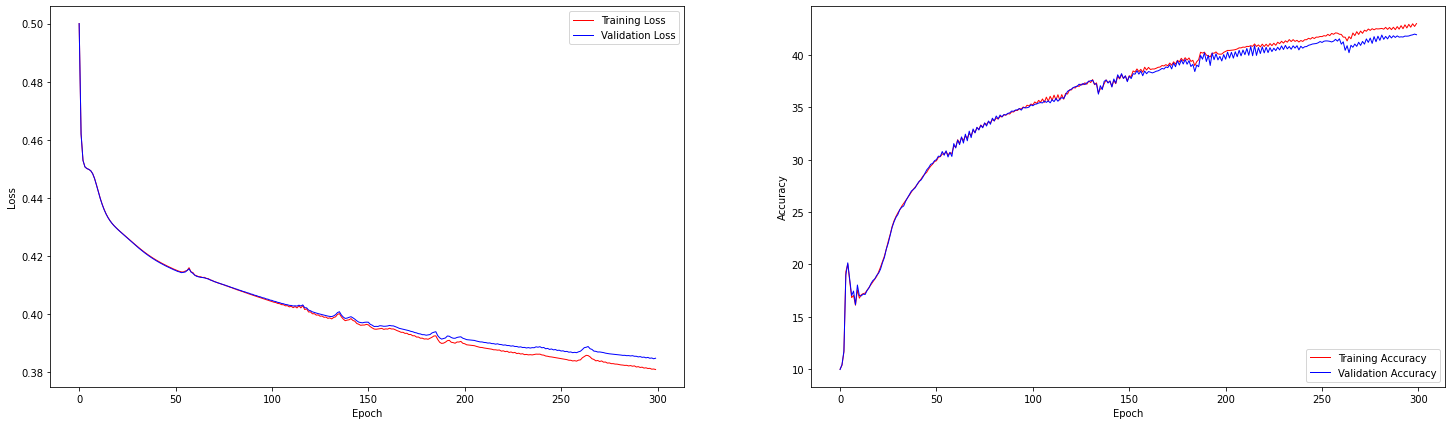

In [ ]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(25,7))
items = {"Training Loss":History[0], "Validation Loss":History[1], "Training Accuracy":History[2], "Validation Accuracy": History[3]}

plt.subplot(1,2,1);
plt.plot(items['Training Loss'], color ='r', linewidth=1, label ='Training Loss');
plt.plot(items['Validation Loss'], color ='b', linewidth=1, label = 'Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(loc='upper right');

plt.subplot(1,2,2);
plt.plot(items['Training Accuracy'], color ='r', linewidth=1, label ='Training Accuracy');
plt.plot(items['Validation Accuracy'], color ='b', linewidth=1, label = 'Validation Accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.show()
